<a href="https://colab.research.google.com/github/syedshahlal/Understanding_Computer_Vision/blob/main/Understanding_Images_and_CV_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [3]:
img="car1.jpeg"

In [4]:
car1=mpimg.imread(img)

In [5]:
car1.shape

(168, 300, 3)

In [6]:
type(car1)

numpy.ndarray

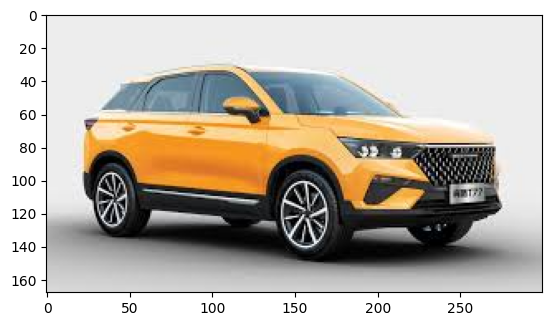

In [7]:
plt.imshow(car1)

In [8]:
car1[0][0]

array([237, 237, 237], dtype=uint8)

In [9]:
car1_cv2 = cv2.imread(img)

In [10]:
from google.colab.patches import cv2_imshow

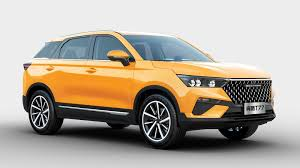

In [11]:
cv2_imshow(car1_cv2)

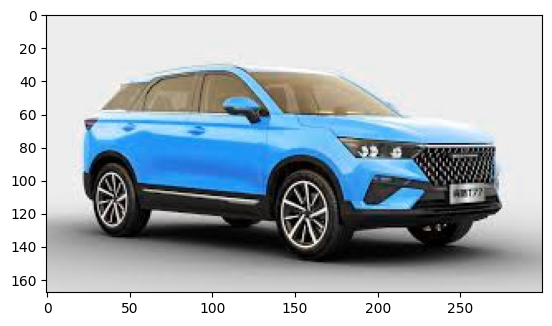

In [12]:
plt.imshow(car1_cv2)        #   cv2 reads the image as BGR and in matplotlib it reads as RGB

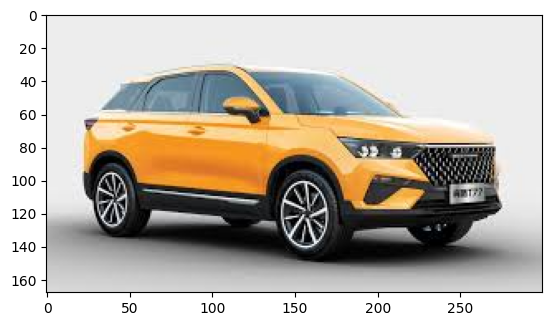

In [13]:
car1_cv2_BGR2RGB = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2RGB)    # converts the image from BGR to RGB
plt.imshow(car1_cv2_BGR2RGB)

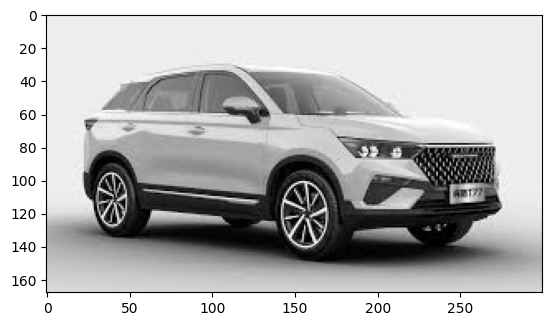

In [14]:
car1_cv2_BGR2GRAY = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2GRAY)    # converts the image from BGR to GRAY
plt.imshow(car1_cv2_BGR2GRAY, cmap='gray')

In [15]:
car1_cv2_BGR2GRAY.shape

(168, 300)

In [16]:
car1_cv2_BGR2GRAY.min(), car1_cv2_BGR2GRAY.max()

(0, 255)

## Understanding the composition of colored images

In [17]:
def visualize_RGB_channel(imgArray=None,figsize=(10,7)):
  #splitting the RGB components
  B, G, R = cv2.split(imgArray)

  #create zero matrix of shape of image
  Z = np.zeros(B.shape, dtype=B.dtype)    # can use any channel

  # init subplots
  fig, ax = plt.subplots(2,2, figsize=figsize)

  # plotting the actual image and RGB images
  [axi.set_axis_off() for axi in ax.ravel()]

  ax[0,0].set_title("Original Image")
  ax[0,0].imshow(cv2.merge((R,G,B)))

  ax[0,1].set_title("Red Channel Image")
  ax[0,1].imshow(cv2.merge((R,Z,Z)))

  ax[1,0].set_title("Green Channel Image")
  ax[1,0].imshow(cv2.merge((Z,G,Z)))


  ax[1,1].set_title("Blue Channel Image")
  ax[1,1].imshow(cv2.merge((Z,Z,B)))

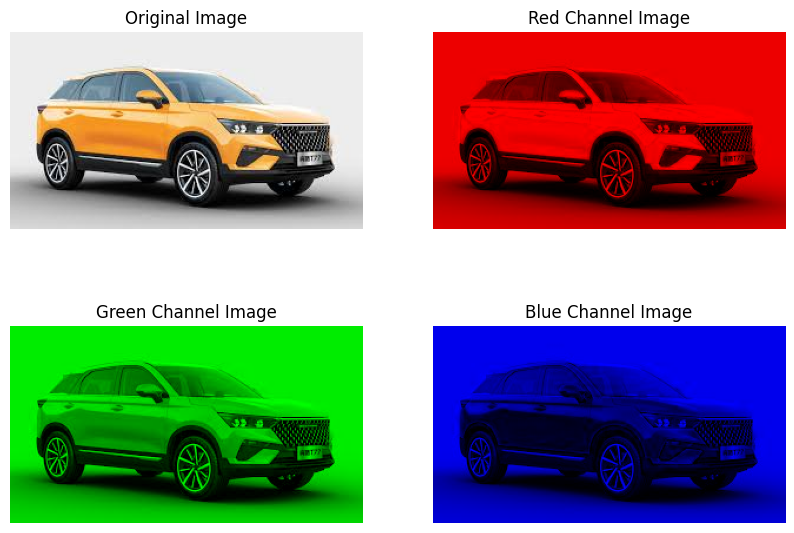

In [18]:
visualize_RGB_channel(imgArray=car1_cv2)

In [19]:
np.random.seed(42)
random_colored_img = np.random.randint(0,255,(6,6,3))
random_colored_img.shape

(6, 6, 3)

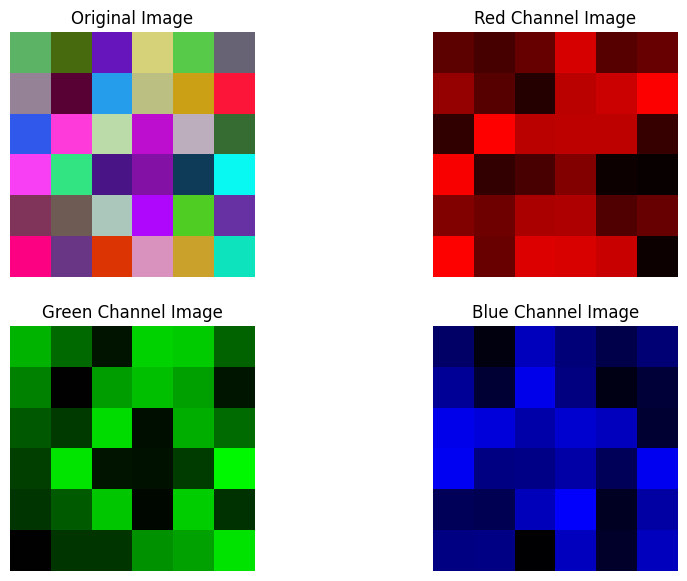

In [20]:
visualize_RGB_channel(imgArray=random_colored_img)

In [21]:
random_colored_img

array([[[102, 179,  92],
        [ 14, 106,  71],
        [188,  20, 102],
        [121, 210, 214],
        [ 74, 202,  87],
        [116,  99, 103]],

       [[151, 130, 149],
        [ 52,   1,  87],
        [235, 157,  37],
        [129, 191, 187],
        [ 20, 160, 203],
        [ 57,  21, 252]],

       [[235,  88,  48],
        [218,  58, 254],
        [169, 219, 187],
        [207,  14, 189],
        [189, 174, 189],
        [ 50, 107,  54]],

       [[243,  63, 248],
        [130, 228,  50],
        [134,  20,  72],
        [166,  17, 131],
        [ 88,  59,  13],
        [241, 249,   8]],

       [[ 89,  52, 129],
        [ 83,  91, 110],
        [187, 198, 171],
        [252,   7, 174],
        [ 34, 205,  80],
        [163,  49, 103]],

       [[131,   1, 253],
        [133,  53, 105],
        [  3,  53, 220],
        [190, 145, 217],
        [ 43, 161, 201],
        [189, 227,  13]]])

## Understanding filters

In [26]:
sobel = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
print(f"Highlighting verticle edges:\n{sobel}")

Highlighting verticle edges:
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [30]:
def simple_conv(imgFilter, picture):
  # finding pixel length
  p_row, p_col = picture.shape

  # finding image length
  f = imgFilter.shape[0]

  temp = []

  stride=1

  # new image size
  final_rows = (p_row - f)//stride + 1
  final_cols = (p_col - f)//stride + 1

  # horizontal stride across cols
  for h_stride in range(final_cols):
    # vertical stride across rows
    for v_stride in range(final_rows):
          target_area_of_the_pic = picture[h_stride: h_stride + f, v_stride: v_stride + f]
          z = sum(sum(imgFilter*target_area_of_the_pic))
          temp.append(z)
  resultant_img = np.array(temp).reshape(final_rows, final_cols)
  return resultant_img